Net(
  (hidden): Linear(in_features=2, out_features=1, bias=True)
)


/home/zhenghao/.conda/envs/yolo/lib/python3.12/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


OrderedDict({'hidden.weight': tensor([[2.4374, 0.7673]]), 'hidden.bias': tensor([-18.2977])})


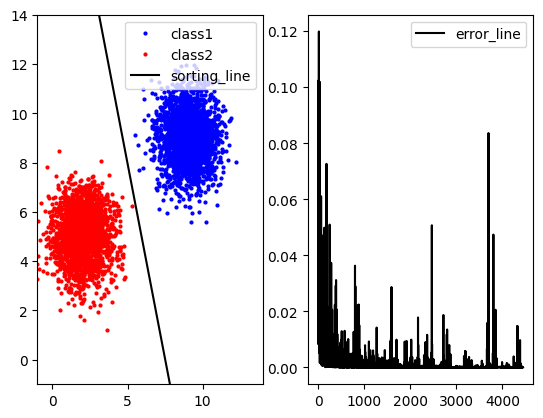

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.utils.data as d
import torch.nn.functional as func
 
#每组训练样本数 总共样本数应为2N
N = 2222
 
#class 1
x_c1 = np.random.randn(N, 2)   # 利用标准正态分布创建N行2列的矩阵
x_c1 = np.add(x_c1, [9, 9])    #加数据以便于区分
y_c1 = np.ones((N, 1), dtype=np.double)
 
#class 2
x_c2 = np.random.randn(N, 2)   # 利用标准正态分布创建N行2列的矩阵
x_c2 = np.add(x_c2, [2, 5])
y_c2 = np.zeros((N, 1), dtype=np.double)
 
 
# 生成数据
# concatenate((x1,x2),axis)为拼接函数 x1，x2为拼接的向量 axis=0行拼接 axis=1列拼接
data_x = np.concatenate((x_c1, x_c2), 0)
data_y = np.concatenate((y_c1, y_c2), 0)
 
#转为tensor向量
# tensor_x=data, tensor_y=label
tensor_x = torch.tensor(data_x, dtype=torch.float)
tensor_y = torch.tensor(data_y, dtype=torch.float)
data_set = d.TensorDataset(tensor_x, tensor_y)
 
 
# shuffle：是否打乱顺序
loader = d.DataLoader(
    dataset=data_set,
    batch_size=10,
    shuffle=True
)
 
 
class Net(nn.Module):
 
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(2, 1)
 
    def forward(self, x):
        return torch.sigmoid(self.hidden(x))
 
 
def line(w, b, x):
    return (1 / w[0][1]) * (- w[0][0] * x - b[0])
 
 
net1 = Net()
print(net1)
 
# net2 = torch.nn.Sequential(
#     nn.Linear(2, 1),
#     nn.Sigmoid()
# )
# print(net2)
 
optimizer = torch.optim.Adam(net1.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()
loss_list = []
 
# training ...
for epoch in range(10):
    for step, (batch_x, batch_y) in enumerate(loader):
        prediction = net1(batch_x)
        loss = loss_func(prediction, batch_y)
        loss_list.append(loss.data.tolist())
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
md = net1.state_dict()
print(md)
W_tensor = md['hidden.weight']
b_tensor = md['hidden.bias']
 
W_np = W_tensor.numpy()
b_np = b_tensor.numpy()
 
X = np.linspace(0, 10, 1000)
 
x1 = x_c1[:, 0].T
y1 = x_c1[:, 1].T
x2 = x_c2[:, 0].T
y2 = x_c2[:, 1].T
 
plt.subplot(1, 2, 1)
plt.plot(x1, y1, "bo", markersize=2, label='class1')
plt.plot(x2, y2, "ro", markersize=2, label='class2')
plt.plot(X, line(W_np, b_np, X), linestyle="-", color="black", label='sorting_line')
 
plt.legend(loc="best")
plt.xlim(-1, 14)
plt.ylim(-1, 14)
 
plt.subplot(1, 2, 2)
plt.plot(loss_list, linestyle="-", color="black", label='error_line')
plt.legend(loc="best")
 
plt.show()